In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from qiskit_metal import draw, Dict, designs, MetalGUI
from qiskit_metal.designs.design_multiplanar import MultiPlanar
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
import qiskit_metal as metal
# ?metal.qlibrary.core.QComponent.add_qgeometry
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
from qiskit_metal.qlibrary.couplers.cap_n_interdigital_tee import CapNInterdigitalTee
from qiskit_metal.qlibrary.couplers.line_tee import LineTee

from collections import OrderedDict

import numpy as np

design = MultiPlanar()
gui = metal.MetalGUI(design)
design.overwrite_enabled = True

# dir(QComponent)

In [4]:
design._chips.main.size.size_x = '5mm'
design._chips.main.size.size_y = '5mm'

cpw_width = '11.7um'

In [5]:
### Top and Bottom
options = Dict(
    orientation = -90,
    pos_y = 2.5 - 0.3,
    # pad_width = '80um',
    # pad_length = '200um',
    # taper_height = '200um',
    trace_width = cpw_width,
    trace_gap = '5.1um'
)
wb1 = LaunchpadWirebond(design, 'wb_top', options=options)

options = Dict(
    orientation = 90,
    pos_y = -2.5 + 0.3,
    # pad_width = '80um',
    # pad_length = '200um',
    # taper_height = '200um',
    trace_width = cpw_width,
    trace_gap = '5.1um'
)
wb2 = LaunchpadWirebond(design, 'wb_bottom', options=options)

In [6]:
stg_opts = Dict(pos_x = '-1250um',
                pos_y = '1200um',
                orientation = '90',
                # width = cpw_width)
)
stg1 = ShortToGround(design, 'stg1', options = stg_opts)

clt1_opts = Dict(prime_width = cpw_width,
                prime_gap = '5.1um',
                second_width = cpw_width,
                second_gap = '5.1um',
                coupling_space = '7.9um',
                coupling_length = '225um',
                open_termination = False,
                orientation = '-90',
                pos_y = '1200um',)
                # down_length = '50um')

clt1 = CoupledLineTee(design, 'clt1', clt1_opts)

cpw1_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'clt1',
                                                    pin = 'second_end'),
                                   end_pin = Dict(component = 'stg1',
                                               pin = 'short')),
                lead = Dict(start_straight = '50um'),
                fillet = '49.9um',
                total_length = '3815um',
                trace_width = cpw_width,
                meander = Dict(spacing = '100um'),
                trace_gap = '5.1um')
cpw1 = RouteMeander(design, 'cpw1', options = cpw1_opts)

In [7]:
stg_opts = Dict(pos_x = '1250um',
                pos_y = '1700um',
                orientation = '-90',
                # width = cpw_width)
)
stg2 = ShortToGround(design, 'stg2', options = stg_opts)

clt2_opts = Dict(prime_width = cpw_width,
                prime_gap = '5.1um',
                second_width = cpw_width,
                second_gap = '5.1um',
                coupling_space = '7.9um',
                coupling_length = '225um',
                open_termination = False,
                orientation = '90',
                pos_y = '1700um',)
                # down_length = '50um')

clt2 = CoupledLineTee(design, 'clt2', clt2_opts)

cpw_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'clt2',
                                                    pin = 'second_end'),
                                   end_pin = Dict(component = 'stg2',
                                               pin = 'short')),
                lead = Dict(start_straight = '50um'),
                fillet = '49.9um',
                total_length = '3715um',
                trace_width = cpw_width,
                meander = Dict(spacing = '100um'),
                trace_gap = '5.1um')
cpw2 = RouteMeander(design, 'cpw2', options = cpw_opts)

In [8]:
stg_opts = Dict(pos_x = '-1250um',
                pos_y = '-300um',
                orientation = '90',
                # width = cpw_width)
)
stg3 = ShortToGround(design, 'stg3', options = stg_opts)

clt_opts = Dict(prime_width = cpw_width,
                prime_gap = '5.1um',
                second_width = cpw_width,
                second_gap = '5.1um',
                coupling_space = '7.9um',
                coupling_length = '225um',
                open_termination = False,
                orientation = '-90',
                pos_y = '-300um',)
                # down_length = '50um')

clt3 = CoupledLineTee(design, 'clt3', clt_opts)

cpw_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'clt3',
                                                    pin = 'second_end'),
                                   end_pin = Dict(component = 'stg3',
                                               pin = 'short')),
                lead = Dict(start_straight = '50um'),
                fillet = '49.9um',
                total_length = '3620um',
                trace_width = cpw_width,
                meander = Dict(spacing = '100um'),
                trace_gap = '5.1um')
cpw3 = RouteMeander(design, 'cpw3', options = cpw_opts)

In [9]:
stg_opts = Dict(pos_x = '1250um',
                pos_y = '250um',
                orientation = '-90',
                # width = cpw_width)
)
stg4 = ShortToGround(design, 'stg4', options = stg_opts)

clt_opts = Dict(prime_width = cpw_width,
                prime_gap = '5.1um',
                second_width = cpw_width,
                second_gap = '5.1um',
                coupling_space = '7.9um',
                coupling_length = '225um',
                open_termination = False,
                orientation = '90',
                pos_y = '250um',)
                # down_length = '50um')

clt4 = CoupledLineTee(design, 'clt4', clt_opts)

cpw_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'clt4',
                                                    pin = 'second_end'),
                                   end_pin = Dict(component = 'stg4',
                                               pin = 'short')),
                lead = Dict(start_straight = '50um'),
                fillet = '49.9um',
                total_length = '3535um',
                trace_width = cpw_width,
                meander = Dict(spacing = '100um'),
                trace_gap = '5.1um')
cpw4 = RouteMeander(design, 'cpw4', options = cpw_opts)

In [10]:
stg_opts = Dict(pos_x = '-1250um',
                pos_y = '-1500um',
                orientation = '90',
                # width = cpw_width)
)
stg5 = ShortToGround(design, 'stg5', options = stg_opts)

clt_opts = Dict(prime_width = cpw_width,
                prime_gap = '5.1um',
                second_width = cpw_width,
                second_gap = '5.1um',
                coupling_space = '7.9um',
                coupling_length = '225um',
                open_termination = False,
                orientation = '-90',
                pos_y = '-1500um',)
                # down_length = '50um')

clt5 = CoupledLineTee(design, 'clt5', clt_opts)

cpw_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'clt5',
                                                    pin = 'second_end'),
                                   end_pin = Dict(component = 'stg5',
                                               pin = 'short')),
                lead = Dict(start_straight = '50um'),
                fillet = '49.9um',
                total_length = '3450um',
                trace_width = cpw_width,
                meander = Dict(spacing = '100um'),
                trace_gap = '5.1um')
cpw5 = RouteMeander(design, 'cpw5', options = cpw_opts)

In [11]:
stg_opts = Dict(pos_x = '1250um',
                pos_y = '-1000um',
                orientation = '-90',
                # width = cpw_width)
)
stg6 = ShortToGround(design, 'stg6', options = stg_opts)

clt_opts = Dict(prime_width = cpw_width,
                prime_gap = '5.1um',
                second_width = cpw_width,
                second_gap = '5.1um',
                coupling_space = '7.9um',
                coupling_length = '225um',
                open_termination = False,
                orientation = '90',
                pos_y = '-1000um',)
                # down_length = '50um')

clt6 = CoupledLineTee(design, 'clt6', clt_opts)

cpw_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'clt6',
                                                    pin = 'second_end'),
                                   end_pin = Dict(component = 'stg6',
                                               pin = 'short')),
                lead = Dict(start_straight = '50um'),
                fillet = '49.9um',
                total_length = '3375um',
                trace_width = cpw_width,
                meander = Dict(spacing = '100um'),
                trace_gap = '5.1um')
cpw6 = RouteMeander(design, 'cpw6', options = cpw_opts)

In [12]:
# RouteStraight.get_template_options(design)
# feedline_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'wb_top',
#                                                         pin = 'tie'),
#                                         end_pin = Dict(component = 'clt2',
#                                                         pin = 'prime_end')),
#                         trace_width = cpw_width,
#                         trace_gap = '5.1um')
# feedline = RouteStraight(design, 'feedline', options = feedline_opts)

# feedline_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'clt2',
#                                                         pin = 'prime_start'),
#                                         end_pin = Dict(component = 'clt1',
#                                                         pin = 'prime_start')),
#                         trace_width = cpw_width,
#                         trace_gap = '5.1um')
# feedline2 = RouteStraight(design, 'feedline2', options = feedline_opts)

# feedline_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'clt1',
#                                                         pin = 'prime_end'),
#                                         end_pin = Dict(component = 'clt4',
#                                                         pin = 'prime_end')),
#                         trace_width = cpw_width,
#                         trace_gap = '5.1um')
# feedline3 = RouteStraight(design, 'feedline3', options = feedline_opts)

# feedline_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'clt4',
#                                                         pin = 'prime_start'),
#                                         end_pin = Dict(component = 'clt3',
#                                                         pin = 'prime_start')),
#                         trace_width = cpw_width,
#                         trace_gap = '5.1um')
# feedline4 = RouteStraight(design, 'feedline4', options = feedline_opts)

In [13]:
feedline_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'wb_top',
                                                        pin = 'tie'),
                                        end_pin = Dict(component = 'wb_bottom',
                                                        pin = 'tie')),
                        trace_width = cpw_width,
                        trace_gap = '5.1um')
feedline = RouteStraight(design, 'feedline', options = feedline_opts)

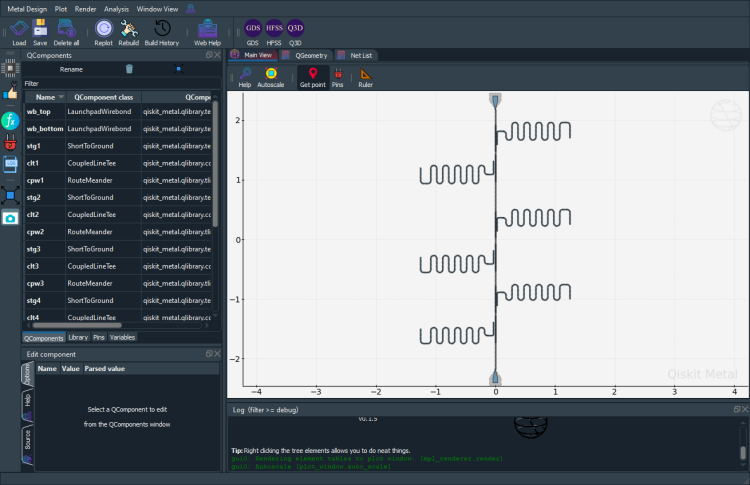

In [14]:
gui.rebuild()
gui.autoscale()
# gui.zoom_on_components(['clt5', 'Q5'])
gui.screenshot()

# Save design as .py file

In [18]:
script_string = design.to_python_script()
with open('linear_resonators_design.py', 'w') as file:
    file.write(script_string)

# Save to GDS

In [ ]:
a_gds = design.renderers.gds
a_gds.options['cheese']['view_in_file']['main'][1]=False
a_gds.options['no_cheese']['view_in_file']['main'][1] = False

a_gds.export_to_gds('6LR_test.gds')

# Simulation (EPR)

In [ ]:
from qiskit_metal.renderers.renderer_ansys_pyaedt.hfss_renderer_eigenmode_aedt import QHFSSEigenmodePyaedt
import pyEPR as epr

In [ ]:
em1_aedt = QHFSSEigenmodePyaedt(design, 
                                'andre_resonators_proj',
                                'andre_resonators_design',
                                initiate=True)
hfss_aedt = em1_aedt.current_app

#### Computer's variables
num_cores=16
num_gpu=1

#### Setup Name
setup_name = 'ResonatorSetup'


# Change silicon permitivity to super cold silicon
em1_aedt.current_app.materials['silicon'].permittivity = 11.45

In [ ]:
def run_simulation():
    #### Computer's variables
    num_cores=16
    num_gpu=1
    
    #### Setup Name
    setup_name = 'ResonatorSetup'
    
    # # Change Silicon to Ultracold Silicon
    # hfss_aedt.materials['silicon'].permittivity = 11.45
    
    # Add project variables
    add_project_level_vars(em1_aedt)
    
    # Clear setups
    if len(hfss_aedt.setups) != 0:
        hfss_aedt.setups[0].delete()
    
    # Add Setup
    setup_options = dict(
        name= setup_name,
        MinimumFrequency = 3,  # GHz
        NumModes= 1,
        MaxDeltaFreq = 0.1,
        MaximumPasses= 50,
        MinimumPasses= None,
        MinimumConvergedPasses= 2,
        PercentRefinement= 30,
        BasisOrder= None
    )
    
    em1_aedt.add_hfss_em_setup(**setup_options)
    
    hfss_aedt.analyze_setup(name=setup_name, 
                            num_cores=num_cores, 
                            num_gpu=num_gpu)
    
    # Make silicon ultra cold
    hfss_aedt.materials['silicon'].permittivity = 11.45

def add_project_level_vars(self):
    """
    Finds all names, inductances, and capacitances of Josephson Junctions rendered into ANSYS.
    """
    # Get all josephson junctions from rendered components table
    geom_table = self.path_poly_and_junction_with_valid_comps
    all_jjs = geom_table.loc[geom_table['name'].str.contains('rect_jj')]
    all_jjs = all_jjs.reset_index(drop=True)

    for i, row in all_jjs.iterrows():
        ### Parsing Data ###
        component = str(row['component'])
        name = str(row['name'])
        inductance = row['aedt_hfss_inductance']  # Lj in Henries
        capacitance = row['aedt_hfss_capacitance']  # Cj in Farads

        # Get ANSYS > Model > Sheet corresponding to JJs
        rect_name = 'JJ_rect_Lj_' + component + '_' + name

        # Get ANSYS > Model > Lines corresponding to JJs
        line_name = 'JJ_Lj_' + component + '_' + name + '_'

        ### Appending data ###
        # Add global Lj and Cj variables to ANSYS (for EPR analysis)
        ansys_Lj_name = f'Lj_{i}'
        ansys_Cj_name = f'Cj_{i}'

        self.set_variable(ansys_Lj_name, str(inductance * 1E9) + 'nH')
        self.set_variable(ansys_Cj_name, str(capacitance * 1E15) + 'fF')

def run_analysis():
    '''
    After finishing simulation, analyze results
    '''
    em1_aedt.run_epr()
    
    # Extract observables of int
    observables = extract_observables(em1_aedt.epr_quantum_analysis)
    return observables



def extract_observables(epra):
    '''
    Extract observables from EPR quantum analysis
    
    Args:
        epra (epr.QuantumAnalysis): Raw EPR Quanutm analysis class
        cos_trunc (int, optional): amount of terms to consider in cosine expansion
        fock_trunc (int, optional): size of fock space before truncation
        
    Returns:
        package (dict): simulated observables
    '''
    
    # Extraction of variables
    omegas = epra.get_frequencies()
    chis = epra.get_chis()
    other_data = epra.data
    
    package = dict(qubit_freq_MHz = omegas['0'][0],
                   qubit_anharmonicity_MHz = chis[0][0],
                   other_data = str(other_data))
    
    return package